
## Time-based retention Model for Mobile Phone Companies
### Jeremia Mathayo Mahenda

The challenge of this study is to propose a time based retention model to determine customers churners in mobile companies to help them to retain customers. 

**Specific Objectives**

- To identify the features that will increase the customer retention in mobile companies.

- To develop the customer retention dataset based on the identified features.

- To measure the performance of the proposed method. 


### Import required libraries

For numerical calclations import

In [125]:
import numpy as np
import pandas as pd

For making plot import

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline

And last, we import the libraries for splitting the set, finding the best model and evaluating the final models.

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.exceptions import DataConversionWarning
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import sksurv.metrics as surv_metrics
from sksurv.datasets import get_x_y

from lifelines import KaplanMeierFitter
from lifelines.plotting import plot_lifetimes

In [128]:
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

#### Load the given data

In [129]:
dt = pd.read_csv("input/data.csv")
dt.head()

,CID,Phone,Gender,CostOfBundles,BetterOfferAgainstOther,CoverageArea,ShareDisappointWith,SatisficationLevel,Age,NoSimCard,NoCalls,CallsCharges,NoSms,SmsCharges,TotalCharges,TimeInServices,Category
0,1,623172211,Female,high,agree,strong,company,satisfied,27,1,25,7000,2500,7000,16500,70,Profitable customer
1,2,625615024,Male,low,disagree,weak,friends,unsatisfied,41,2,10,3500,100,3500,7100,27,Non profitable customer
2,3,628057837,Male,low,disagree,weak,friends,unsatisfied,22,3,5,2000,50,2000,4050,20,Non profitable customer
3,4,630500650,Male,high,agree,strong,company,satisfied,22,1,15,10000,1500,10000,21500,100,Profitable customer
4,5,632943463,Female,high,agree,strong,company,satisfied,42,1,19,5000,1900,5000,11900,5,Profitable customer


### Review the data

In [130]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CID                      100 non-null    int64 
 1   Phone                    100 non-null    int64 
 2   Gender                   100 non-null    object
 3   CostOfBundles            100 non-null    object
 4   BetterOfferAgainstOther  100 non-null    object
 5   CoverageArea             100 non-null    object
 6   ShareDisappointWith      100 non-null    object
 7   SatisficationLevel       100 non-null    object
 8   Age                      100 non-null    int64 
 9   NoSimCard                100 non-null    int64 
 10  NoCalls                  100 non-null    int64 
 11  CallsCharges             100 non-null    int64 
 12  NoSms                    100 non-null    int64 
 13  SmsCharges               100 non-null    int64 
 14  TotalCharges             100 non-null    in

In [131]:
print(f"The dataset contains {dt.shape[0]} observations, from which we have {dt.shape[1]} attributes")

The dataset contains 100 observations, from which we have 17 attributes


In [132]:
print(f"Among their attributes, we observe {dt.columns.tolist()}")

Among their attributes, we observe ['CID', 'Phone', 'Gender', 'CostOfBundles', 'BetterOfferAgainstOther', 'CoverageArea', 'ShareDisappointWith', 'SatisficationLevel', 'Age', 'NoSimCard', 'NoCalls', 'CallsCharges', 'NoSms', 'SmsCharges', 'TotalCharges', 'TimeInServices', 'Category']


In [133]:
print("Column          Missing values")
print("------------------------------")
dt.isnull().sum()

Column          Missing values
------------------------------


CID                        0
Phone                      0
Gender                     0
CostOfBundles              0
BetterOfferAgainstOther    0
CoverageArea               0
ShareDisappointWith        0
SatisficationLevel         0
Age                        0
NoSimCard                  0
NoCalls                    0
CallsCharges               0
NoSms                      0
SmsCharges                 0
TotalCharges               0
TimeInServices             0
Category                   0
dtype: int64

In [134]:
print("Column               types")
print("--------------------------")
dt.dtypes

Column               types
--------------------------


CID                         int64
Phone                       int64
Gender                     object
CostOfBundles              object
BetterOfferAgainstOther    object
CoverageArea               object
ShareDisappointWith        object
SatisficationLevel         object
Age                         int64
NoSimCard                   int64
NoCalls                     int64
CallsCharges                int64
NoSms                       int64
SmsCharges                  int64
TotalCharges                int64
TimeInServices              int64
Category                   object
dtype: object

In [135]:
print("Column         Unique Values")
print("----------------------------")
dt.nunique()

Column         Unique Values
----------------------------


CID                        100
Phone                      100
Gender                       2
CostOfBundles                2
BetterOfferAgainstOther      3
CoverageArea                 2
ShareDisappointWith          2
SatisficationLevel           2
Age                         19
NoSimCard                    3
NoCalls                     34
CallsCharges                35
NoSms                       56
SmsCharges                  35
TotalCharges                94
TimeInServices              34
Category                     2
dtype: int64

In [136]:
dt.duplicated().sum()

0

### Perfom data cleaning

From the name of the attributes, we can distinguish that two columns are spectific for identifying each customer. We need to drop them from the dataset as they are not going to be useful for the analysis.

In [137]:
dt.drop(['Phone', 'CID'], axis=1, inplace=True)

### Exploratory Data Analysis

Visualize both profitable and Non profitable customers

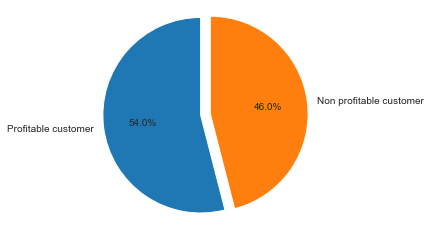

In [138]:
plt.pie(dt["Category"].value_counts(),explode=(0,0.1), autopct='%1.1f%%',
        shadow=False, startangle=90,labels=dt["Category"].unique())
plt.axis('equal') ;

Visualize data based on all categorical label

In [139]:
#Define categorical labels
categorical_labels = [['Gender', 'CostOfBundles'], ['BetterOfferAgainstOther', 'ShareDisappointWith'], ['CoverageArea','SatisficationLevel']]
colors = [['Set1', 'Set2'], ['Set3', 'PuRd'], [ 'Blues', 'Accent']]

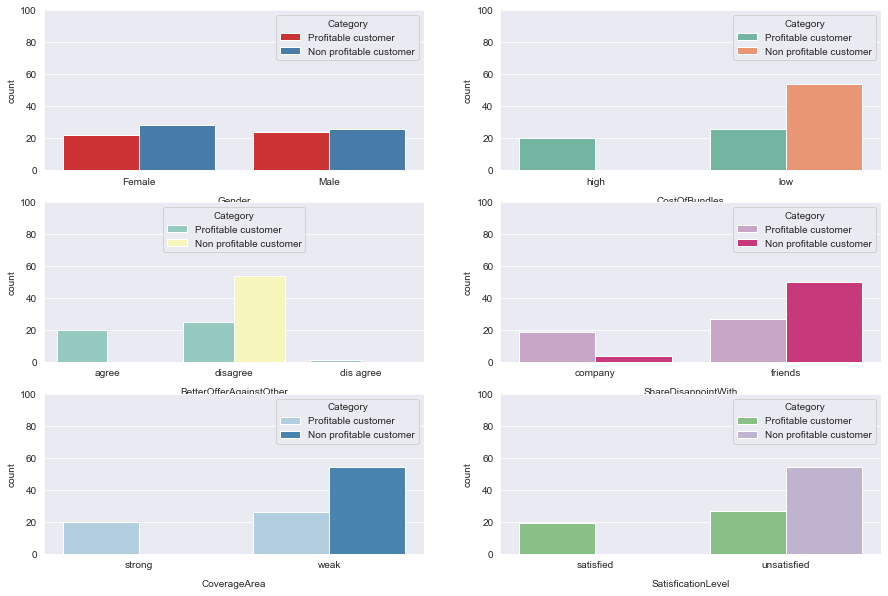

In [140]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
for i in range(3):
    for j in range(2):
        feature = categorical_labels[i][j]
        color = colors[i][j]
        ax1 = sns.countplot(x=feature, hue='Category', palette=color, data=dt, ax=ax[i][j])
        ax1.set_xlabel(feature, labelpad=10)
        #change data limit based on the amount of data in a csv 
        ax1.set_ylim(0, 100)
        ax1.legend(title='Category', labels= ['Profitable customer', 'Non profitable customer'])
sns.despine()

Change category attribute values to 0 and 1

In [141]:
dt['Category'] = dt['Category'].apply(lambda x: 1 if x == 'Non profitable customer' else 0 )

Check detailed info by word from the above plots

In [142]:
gender_male = round(dt[(dt['Category'] == 1) & (dt['Gender'] == 'Male')]['Category'].count() / dt[dt['Gender'] == 'Male']['Category'].count() *100, 2)
gender_female = round(dt[(dt['Category'] == 1) & (dt['Gender'] == 'Female')]['Category'].count() / dt[dt['Gender'] == 'Female']['Category'].count() *100, 2)

print(f"Gender based churn: the percentage of all {dt[dt['Gender'] == 'Male']['Category'].count()} male customers churning is {gender_male}% of the available male, while the percetage of all { dt[dt['Gender'] == 'Female']['Category'].count()} female customers churning is {gender_female}% of the available female")

Gender based churn: the percentage of all 50 male customers churning is 52.0% of the available male, while the percetage of all 50 female customers churning is 56.0% of the available female


In [143]:
cost_of_bundles_high = round(dt[(dt['Category'] == 1) & (dt['CostOfBundles'] == 'high')]['Category'].count() / dt[dt['CostOfBundles'] == 'high']['Category'].count()*100, 2)
cost_of_bundles_low = round(dt[(dt['Category'] == 1) & (dt['CostOfBundles'] == 'low')]['Category'].count() / dt[dt['CostOfBundles'] == 'low']['Category'].count() * 100, 2)

print(f"Cost of bundles based churn: the percentage of customers churning with high response is {cost_of_bundles_high}% of all with high response,  while the percetage of customers churning with low response is {cost_of_bundles_low}% of all with low response")

Cost of bundles based churn: the percentage of customers churning with high response is 0.0% of all with high response,  while the percetage of customers churning with low response is 67.5% of all with low response


In [144]:
betterofferaganstother_agree = round(dt[(dt['Category'] == 1) & (dt['BetterOfferAgainstOther'] == 'agree')]['Category'].count() / dt[dt['BetterOfferAgainstOther'] == 'agree']['Category'].count()*100, 2)
betterofferaganstother_disagree = round(dt[(dt['Category'] == 1) & (dt['BetterOfferAgainstOther'] == 'disagree')]['Category'].count() / dt[dt['BetterOfferAgainstOther'] == 'disagree']['Category'].count() * 100, 2)

print(f"Better offer against other based churn: the percentage of customers churning with agree response is {betterofferaganstother_agree}% of all with agree response, while the percetage of customers churning with disagree response is {betterofferaganstother_disagree}% of all with disagree response")

Better offer against other based churn: the percentage of customers churning with agree response is 0.0% of all with agree response, while the percetage of customers churning with disagree response is 68.35% of all with disagree response


In [145]:
ShareDisappointWith_company = round(dt[(dt['Category'] == 1) & (dt['ShareDisappointWith'] == 'company')]['Category'].count() / dt[dt['ShareDisappointWith'] == 'company']['Category'].count()*100, 2)
ShareDisappointWith_friends = round(dt[(dt['Category'] == 1) & (dt['ShareDisappointWith'] == 'friends')]['Category'].count() / dt[dt['ShareDisappointWith'] == 'friends']['Category'].count() * 100, 2)

print(f"ShareDisappointWith based churn: the percentage of customers churning with company response is {ShareDisappointWith_company}% of all who shared with company, while the percetage of customers churning with friends response is {ShareDisappointWith_friends}% of all who shared with friends")

ShareDisappointWith based churn: the percentage of customers churning with company response is 17.39% of all who shared with company, while the percetage of customers churning with friends response is 64.94% of all who shared with friends


In [146]:
coverage_area_strong = round(dt[(dt['Category'] == 1) & (dt['CoverageArea'] == 'strong')]['Category'].count() / dt[dt['CoverageArea'] == 'strong']['Category'].count()*100, 2)
coverage_area_weak = round(dt[(dt['Category'] == 1) & (dt['CoverageArea'] == 'weak')]['Category'].count() / dt[dt['CoverageArea'] == 'weak']['Category'].count() * 100, 2)

print(f"Coverage area based churn: the percentage of customers churning with strong response is {coverage_area_strong}% of all with strong response, while the percetage of customers churning with weak is {coverage_area_weak}% of all with weak response")

Coverage area based churn: the percentage of customers churning with strong response is 0.0% of all with strong response, while the percetage of customers churning with weak is 67.5% of all with weak response


In [147]:
satisficationlevel_s = round(dt[(dt['Category'] == 1) & (dt['SatisficationLevel'] == 'satisfied')]['Category'].count() / dt[dt['SatisficationLevel'] == 'satisfied']['Category'].count()*100, 2)
satisficationlevel_us = round(dt[(dt['Category'] == 1) & (dt['SatisficationLevel'] == 'unsatisfied')]['Category'].count() / dt[dt['SatisficationLevel'] == 'unsatisfied']['Category'].count() * 100, 2)

print(f"Satificaton level based churn: the percentage of customers churning with satisfied response is {satisficationlevel_s}% of all with satisfied response, while the percetage of customers churning with unsatisfied response is {satisficationlevel_us}% of all with unsatisfied response")

Satificaton level based churn: the percentage of customers churning with satisfied response is 0.0% of all with satisfied response, while the percetage of customers churning with unsatisfied response is 66.67% of all with unsatisfied response


From the plots and the calculations, we learn several things:

- The proportion of female customers that churn is greater than the proportion of male customers. 

- Most of the customers become churn based on the high cost of bundles.

- The poor offer cause customer churn.

- The weak netwirk cverage cause customers churn.

- The poor response from friends cause customers churn.

- The poor satisfication level cause customers churn.

Visualize data based on all numerical label

In [148]:
numerical_labels = [['Age', 'TotalCharges'], ['NoCalls', 'NoSms'], ['CallsCharges', 'SmsCharges'],
                    ['TimeInServices', 'NoSimCard']]
num_colors = [['Set1', 'Set2'], ['Set3', 'PuRd'], ['Blues', 'Accent']]

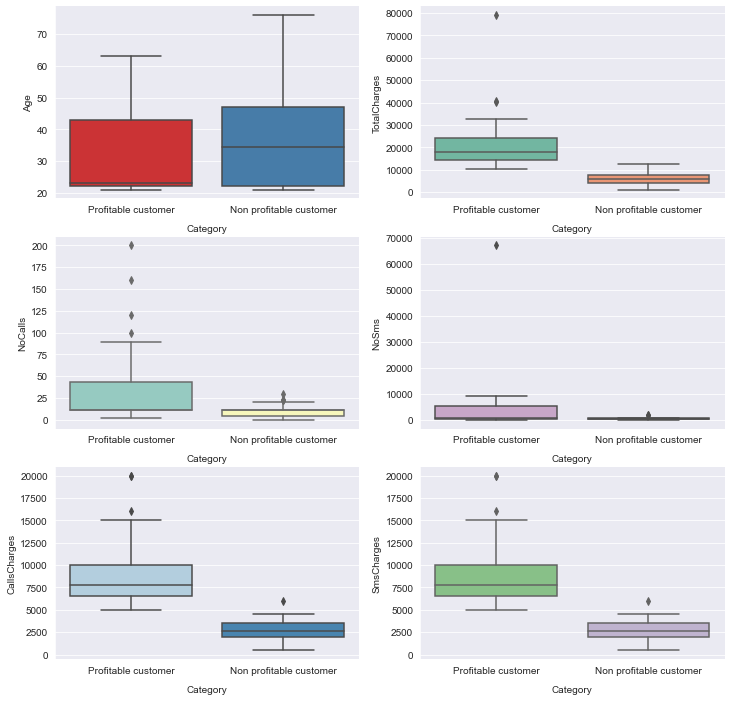

In [149]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
for i in range(3):
    for j in range(2):
        feature = numerical_labels[i][j]
        color = num_colors[i][j]
        ax1 = sns.boxplot(x='Category', y=feature, palette=color, data=dt, ax=ax[i][j])
        ax1.set_xlabel('Category', labelpad=10)
        ax1.set_xticklabels(['Profitable customer', 'Non profitable customer'])
sns.despine()

In [150]:
# Check median age for churning and no churning customers
pd.DataFrame(dt.groupby('Category')['Age'].describe())

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
0,46.0,31.456522,12.510807,21.0,22.0,23.0,43.0,63.0
1,54.0,37.518519,16.092587,21.0,22.0,34.5,47.0,76.0


In [151]:
# Check median total charges for churning and no churning customers
pd.DataFrame(dt.groupby('Category')['TotalCharges'].describe())

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
0,46.0,21083.934783,11364.273878,10411.0,14536.0,18132.5,24165.75,79000.0
1,54.0,5874.777778,2649.045949,1111.0,4035.0,5782.5,7846.25,12711.0


In [152]:
# Check median tenure for churning and no churning customers
pd.DataFrame(dt.groupby('Category')['TimeInServices'].describe())

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
0,46.0,24.260870,18.580079,5.0,14.25,20.0,26.75,100.0
1,54.0,20.518519,14.825705,1.0,11.00,20.5,27.75,93.0


In [153]:
# Check median simcard for churning and no churning customers
pd.DataFrame(dt.groupby('Category')['NoSimCard'].describe())

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
0,46.0,1.565217,0.501206,1.0,1.0,2.0,2.0,2.0
1,54.0,2.018519,0.136083,2.0,2.0,2.0,2.0,3.0


In [154]:
# Check median calls for churning and no churning customers
pd.DataFrame(dt.groupby('Category')['NoCalls'].describe())

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
0,46.0,34.913043,42.184160,2.0,11.00,11.0,43.75,200.0
1,54.0,9.703704,6.465087,0.0,4.25,11.0,11.00,30.0


In [155]:
# Check median sms for churning and no churning customers
pd.DataFrame(dt.groupby('Category')['NoSms'].describe())

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
0,46.0,3736.108696,9911.267136,52.0,511.0,611.0,5179.25,67000.0
1,54.0,426.629630,378.712182,0.0,211.0,322.0,596.00,2000.0


From the plots and the calculations, we learn several things:

- Customers that churn are older than those who are retained.

- Among the customers that churn, most of them seem to spent small amount of money.

- Those stayed in service for few days are seems  to be churned customers.

- Great number of sim card seems to have an effect on customer churn.

- The small amount of calls the higher the churn rate

- The small amount of message sent the higher the churn rate

#### Now we have to detemine how long it take for a customer to churn(become non profutable customer).

Let's us see total record, percent and time interval of a customer

In [156]:
print("Total Records:",dt.shape[0],"\n")
print("Percent customer churn rate:",round(dt.Category.mean(), 2))
print("")
print("Tenure Intervals")
print(dt['TimeInServices'].describe())

Total Records: 100 

Percent customer churn rate: 0.54

Tenure Intervals
count    100.000000
mean      22.240000
std       16.676434
min        1.000000
25%       12.750000
50%       20.500000
75%       27.250000
max      100.000000
Name: TimeInServices, dtype: float64


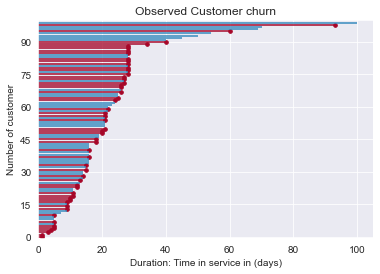

In [157]:
ax = plot_lifetimes(dt.head(100)['TimeInServices'], dt.head(100)['Category'])

_=ax.set_xlabel("Duration: Time in service in (days)")
_=ax.set_ylabel("Number of customer")
_=ax.set_title("Observed Customer churn")

From the above plot, 

Red lines indicates when a customer churn(become non profitable customer) with the dots indicating the specific point in time.

Blue lines are customers that are still active/retained(Profitable customer) up to the time measured on the x-axis in Duration.

Here we see that customer number 99 and 100 did not churn until up to 90 days respectively, with most customer number 1 to 90 leaving in under 40 days.

A more informative approach might be to estimate the Survival Function or the time in days a customer has until they churn.
For this purpose, we will use a Kaplan Meier Estimator to calculate how long until customer churn occurs

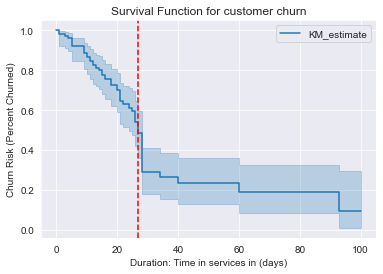

In [158]:
kmf = KaplanMeierFitter()

kmf.fit(dt['TimeInServices'], event_observed=dt['Category'])

kmf.plot_survival_function()
_=plt.title('Survival Function for customer churn');
_=plt.xlabel("Duration: Time in services in (days)")
_=plt.ylabel("Churn Risk (Percent Churned)")
_=plt.axvline(x=kmf.median_survival_time_, color='r', linestyle='--')

From the plot above, We see the point where the vertical line become red dashed, it means that about 26 days back before the maximum time(3month/90days), a half(0.5) of customers churn

Create dummy data

In [159]:
dt.drop("TotalCharges",inplace = True, axis = 1)

cat_cols = [x for x in dt.columns if dt[x].nunique()<8 and x!="Category"]
dt = pd.get_dummies(data = dt,columns = cat_cols)
dt.head()

,Age,NoCalls,CallsCharges,NoSms,SmsCharges,TimeInServices,Category,Gender_Female,Gender_Male,CostOfBundles_high,...,BetterOfferAgainstOther_disagree,CoverageArea_strong,CoverageArea_weak,ShareDisappointWith_company,ShareDisappointWith_friends,SatisficationLevel_satisfied,SatisficationLevel_unsatisfied,NoSimCard_1,NoSimCard_2,NoSimCard_3
0,27,25,7000,2500,7000,70,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
1,41,10,3500,100,3500,27,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
2,22,5,2000,50,2000,20,1,0,1,0,...,1,0,1,0,1,0,1,0,0,1
3,22,15,10000,1500,10000,100,0,0,1,1,...,0,1,0,1,0,1,0,1,0,0
4,42,19,5000,1900,5000,5,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0


 ### Data splitting and preprocessings

Split the data

In [160]:
dt_train, dt_test = train_test_split(dt, test_size=0.30, random_state=43)
print("Training set has {} samples.".format(dt_train.shape[0]))
print("Testing set has {} samples.".format(dt_test.shape[0]))

Training set has 70 samples.
Testing set has 30 samples.


Work with numeric features and categorical features

In [161]:
#Remove all non numerical data and time in services
numerical_idx = (
        dt_train.select_dtypes(exclude=["object", 'category'])
        .drop(['Category','TimeInServices'],1)
        .columns.tolist()
    )
#leave all object ty[e data]
categorical_idx = dt_train.select_dtypes(exclude=["float", "int"]).columns.tolist()

First fill with the median

In [162]:
numeric_transformer = Pipeline(
        steps=[
            ("scaler", StandardScaler()),
        ]
    )

re one-hot to encode them

In [163]:
categorical_transformer = Pipeline(
        steps=[
            ("onehot", OneHotEncoder(sparse=False, handle_unknown="ignore")),
        ]
    )

Preprocess both numerical and categorical features

In [164]:
preprocessor = ColumnTransformer(
        [
            ("numerical", numeric_transformer, numerical_idx),
            ("categorical", categorical_transformer, categorical_idx),
        ],
        remainder="passthrough",
    )

Explore train and test features

In [165]:
train_features = preprocessor.fit_transform(dt_train.drop(['Category','TimeInServices'],1))
test_features = preprocessor.transform(dt_test.drop(['Category','TimeInServices'],1))

create survival function to return array of outcome encoded for XGB 

In [166]:
def survival_y_cox(dframe:pd.DataFrame) -> np.array:
    """Returns array of outcome encoded for XGB"""
    y_survival = []

    for idx, row in dframe[["TimeInServices", "Category"]].iterrows():
        if row["Category"]:
            # uncensored
            y_survival.append(int(row["TimeInServices"]))
        else:
            # right censored
            y_survival.append(-int(row["TimeInServices"]))
    return np.array(y_survival)

Get feature names, and apply xgb DMatrix to store the data

In [167]:
feature_names = np.hstack((np.array(numerical_idx),
                           preprocessor.transformers_[1][1]['onehot'].get_feature_names()))
dm_train = xgb.DMatrix(
    train_features, label=survival_y_cox(dt_train), feature_names=feature_names
)

dm_test = xgb.DMatrix(
    test_features, label=survival_y_cox(dt_test), feature_names=feature_names
)

Create parameters for Tree Booster [see more ](https://nodepit.com/node/org.knime.xgboost.base.nodes.learner.XGBTreeClassificationLearnerNodeFactory)

In [168]:
params = {
    "eta": 0.1,
    "max_depth": 3, 
    "objective": "survival:cox",
    "tree_method": "hist",
    "subsample": 0.8,
    "seed": 100
}
bst = xgb.train(
    params,
    dm_train,
    num_boost_round=300,
    evals=[(dm_train, "train"), (dm_test, "test")],
    verbose_eval=int(1e1),
    early_stopping_rounds=10
)

[0]	train-cox-nloglik:3.26742	test-cox-nloglik:2.61719
[10]	train-cox-nloglik:2.78128	test-cox-nloglik:2.38032
[20]	train-cox-nloglik:2.59808	test-cox-nloglik:2.32998
[28]	train-cox-nloglik:2.51211	test-cox-nloglik:2.33383


Predicting when churn is most likely to occur we will want the exponentiated version as it intuits to a probability.

In [169]:
dt_test.loc[:,"preds"] = bst.predict(dm_test, output_margin=True) 
dt_test.loc[:, "preds_exp"] = bst.predict(dm_test, output_margin=False) 

Mow we work with Hazard scores or the probability of churn conditioned on time (in this case Tenure), and look at overall when churn is most likely to occur.

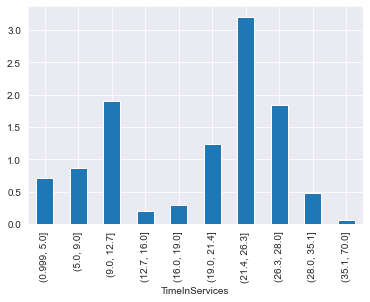

In [170]:
_=dt_test.groupby(pd.qcut(dt_test['TimeInServices'], q=10,  duplicates='drop'))['preds_exp'].median().plot(kind="bar")

From the plot, the time(Tenure) periods shows that the highest churn risk happens at days 21 and 26.

### Feature importance

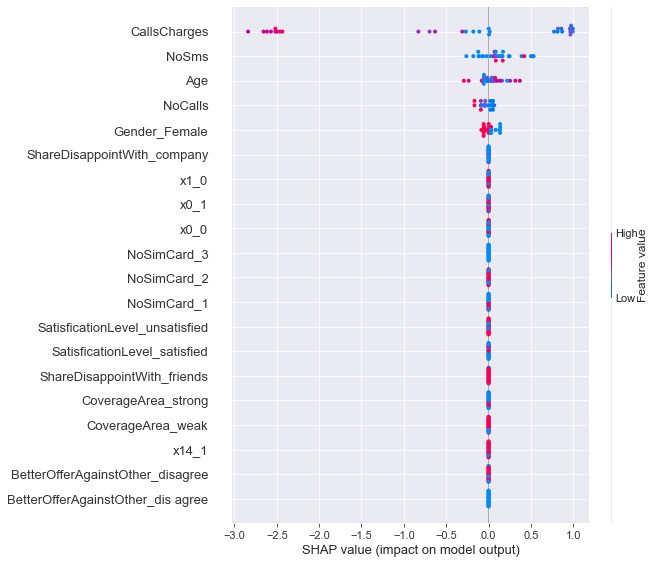

In [171]:
import shap

explainer = shap.TreeExplainer(bst, feature_names=feature_names)
shap_values = explainer.shap_values(test_features) 

shap.summary_plot(shap_values, pd.DataFrame(test_features, columns=feature_names))

we explore callscharges, nosms and age as the features that cause customer churn 

Let's plot tree that will help us to understand what feature cause customer churn

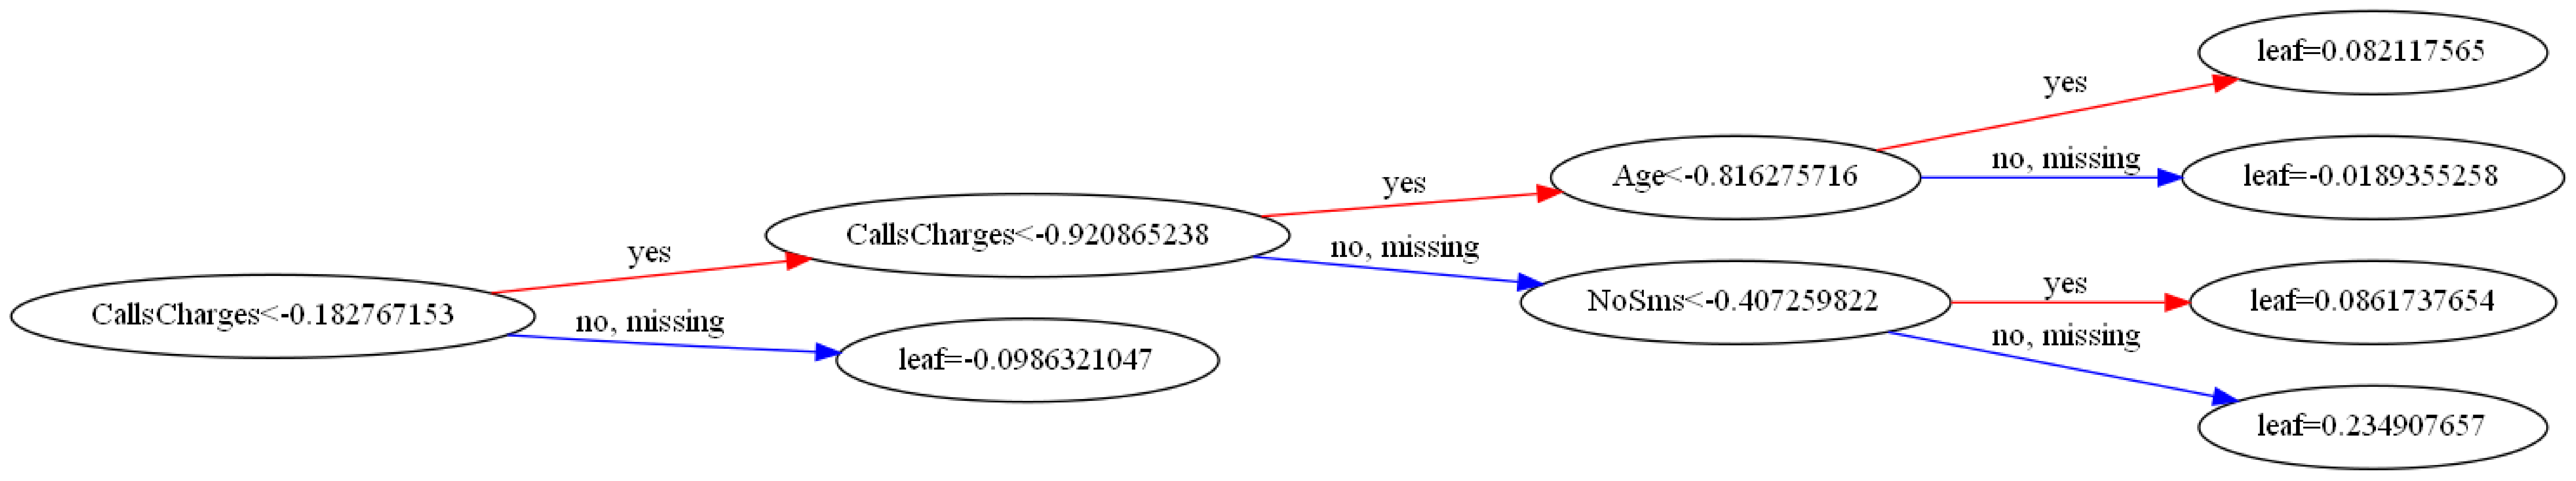

In [172]:
import graphviz

xgb.plot_tree(bst, rankdir="LR", num_trees=0)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig("tree.png", bbox_inches="tight")

From the tree above, we see that call charges, Age and number of sms within the given time(Three months) cause customer churn, im order to overcome the problem and retain the customer we have to develop some strategies that may help the company to retain customer based on the provided features on our model,

- The call charges cause customer churn when the charge increase cannot afford the charge.
- As the Age become higher the customer churn increase
- The small amount of sms sent per three months cause the customer churn here a company should improve their sms charges to reflect the customers affodability

### Test the model

In [173]:
from sklearn import metrics

y_preds = dt_test.preds.apply(lambda x : np.exp(x))
y_pred = np.where(y_preds > 0.5, 1, 0)

print(f"Accuracy score: {metrics.accuracy_score(dt_test.Category, y_pred)}")
print(f"Area Under the Curve {metrics.roc_auc_score(dt_test.Category, y_pred)}")
print("")
print(metrics.classification_report(dt_test.Category, y_pred))

Accuracy score: 0.9333333333333333
Area Under the Curve 0.9321266968325792

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.94      0.94      0.94        17

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



From the above, the model tested and returning the accuracy of 0.93 equivallent to 93%, to sum up the developed time based retention model is good to be used to help the mobile company to retain customer